In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"


In [142]:
# Read the mouse data
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [143]:
 # Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [144]:
# Combine the data into a single dataset

complete_study_data = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
complete_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [145]:
# Checking the number of mice.
number_of_mice = complete_study_data["Mouse ID"].nunique()
print(number_of_mice)

249


In [146]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
get_duplicate = complete_study_data[complete_study_data.duplicated(["Mouse ID", "Timepoint"])]
get_duplicate.value_counts()

# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate = complete_study_data.loc[complete_study_data["Mouse ID"] == "g989", :]
all_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [147]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = complete_study_data.loc[complete_study_data["Mouse ID"]!= "g989"]
#clean_data = complete_study_data.drop_duplicates(subset=["Mouse ID", "Timepoint"]) 
clean_data                                                       

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [148]:
# Checking the number of mice in the clean DataFrame.

clean_number_of_mice = clean_data["Mouse ID"].nunique()
clean_number_of_mice

248

# Summary Statistics

In [149]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

sum_mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean() 
sum_median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
sum_variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sum_standard_deviation = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sum_SEM = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_statistics = pd.DataFrame({ "Tumor Volume Mean": sum_mean,
                                    "Tumor Volume Median": sum_median,
                                    "Tumor Volume Variance": sum_variance,
                                    "Tumor Volume Standard Deviation": sum_standard_deviation,
                                    "Tumor Volume SEM": sum_SEM
    
})

summary_statistics

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [150]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
summary_agg 


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

<AxesSubplot:title={'center':'Total number of Timepoints per Drug '}, xlabel='Drug Regimen', ylabel='Mice Count'>

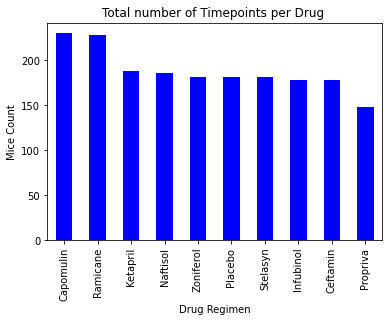

In [151]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_tested = clean_data["Drug Regimen"].value_counts()
mice_tested
bar_plot = mice_tested.plot.bar(figsize =(6,4), color="b", rot=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.title("Total number of Timepoints per Drug ")
bar_plot

Text(0.5, 1.0, 'Total number of Timepoints per Drug ')

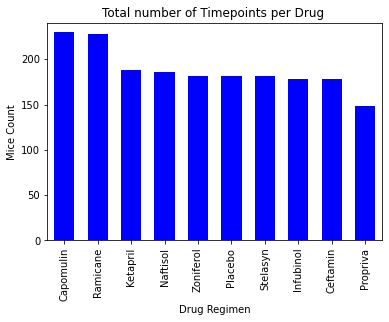

In [152]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(mice_tested))
y_axis = mice_tested

plt.bar(x_axis, y_axis, color="b", width=0.6, align="center")

ticks = list(mice_tested.index.values)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ticks, rotation="90")

plt.xlim(-0.5, len(x_axis)-0.5)

plt.ylim(0, max(y_axis)+10)

plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.title("Total number of Timepoints per Drug ")


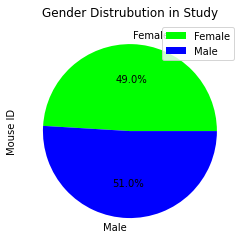

In [153]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender = clean_data.groupby(["Sex"]).count()
mice_gender.plot.pie(autopct= "%1.1f%%", colors = ["lime", "blue"], y="Mouse ID", title="Gender Distrubution in Study", figsize=(6,4))
plt.show()

In [154]:
mice_gender = clean_data.groupby(["Sex"]).count()
mice_gender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


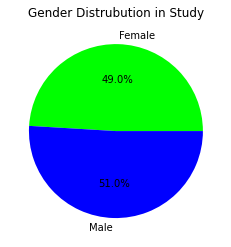

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode = (0,0)
colors = ["lime", "blue"]
sex = ["Female", "Male"]
distrubution = ["922", "958"]

plt.pie(distrubution, explode=explode, labels=sex, colors=colors, autopct="%1.1f%%")
plt.title("Gender Distrubution in Study")

plt.show()

# Quartiles, Outliers and Boxplots

In [156]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
max_capomulin = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_pd = pd.DataFrame(max_capomulin)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_capomulin = pd.merge(max_capomulin, clean_data, on = ("Mouse ID", "Timepoint"))
merge_capomulin

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_vol = merge_capomulin["Tumor Volume (mm3)"]
capomulin_quartiles = capomulin_vol.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

print(f"The lower quartile of Capomulin tumors is: {capomulin_lowerq}")
print(f"The upper quartile of Capomulin tumors is: {capomulin_upperq}")
print(f"The interquartile range of Capomulin tumors is: {capomulin_iqr}")
print(f"The the median of Capomulin tumors is: {capomulin_quartiles[0.5]} ")

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")


The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
The the median of Capomulin tumors is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [157]:
# Start by getting the last (greatest) timepoint for each mouse
max_ramicane = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_pd = pd.DataFrame(max_ramicane)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_ramicane = pd.merge(max_ramicane, clean_data, on = ("Mouse ID", "Timepoint"))
merge_ramicane

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ramicane_vol = merge_ramicane["Tumor Volume (mm3)"]
ramicane_quartiles = ramicane_vol.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

print(f"The lower quartile of Ramicane tumors is: {ramicane_lowerq}")
print(f"The upper quartile of Ramicane tumors is: {ramicane_upperq}")
print(f"The interquartile range of Ramicane tumors is: {ramicane_iqr}")
print(f"The the median of Ramicane tumors is: {ramicane_quartiles[0.5]} ")

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Values below {ramicane_lower_bound} could be outliers.")
print(f"Values above {ramicane_upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The the median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [158]:
# Start by getting the last (greatest) timepoint for each mouse
max_infubinol = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_pd = pd.DataFrame(max_infubinol)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_infubinol = pd.merge(max_infubinol, clean_data, on = ("Mouse ID", "Timepoint"))
merge_infubinol

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
infubinol_vol = merge_infubinol["Tumor Volume (mm3)"]
infubinol_quartiles = infubinol_vol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

print(f"The lower quartile of infubinol tumors is: {infubinol_lowerq}")
print(f"The upper quartile of infubinol tumors is: {infubinol_upperq}")
print(f"The interquartile range of infubinol tumors is: {infubinol_iqr}")
print(f"The the median of infubinol tumors is: {infubinol_quartiles[0.5]} ")

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Values below {infubinol_lower_bound} could be outliers.")
print(f"Values above {infubinol_upper_bound} could be outliers.")

The lower quartile of infubinol tumors is: 54.04860769
The upper quartile of infubinol tumors is: 65.52574285
The interquartile range of infubinol tumors is: 11.477135160000003
The the median of infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [159]:
# Start by getting the last (greatest) timepoint for each mouse
max_ceftamin = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_pd = pd.DataFrame(max_ceftamin)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_ceftamin = pd.merge(max_ceftamin, clean_data, on = ("Mouse ID", "Timepoint"))
merge_ceftamin

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceftamin_vol = merge_ceftamin["Tumor Volume (mm3)"]
ceftamin_quartiles = ceftamin_vol.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

print(f"The lower quartile of ceftamin tumors is: {ceftamin_lowerq}")
print(f"The upper quartile of ceftamin tumors is: {ceftamin_upperq}")
print(f"The interquartile range of ceftamin tumors is: {ceftamin_iqr}")
print(f"The the median of ceftamin tumors is: {ceftamin_quartiles[0.5]} ")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Values below {ceftamin_lower_bound} could be outliers.")
print(f"Values above {ceftamin_upper_bound} could be outliers.")

The lower quartile of ceftamin tumors is: 48.72207785
The upper quartile of ceftamin tumors is: 64.29983003
The interquartile range of ceftamin tumors is: 15.577752179999997
The the median of ceftamin tumors is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


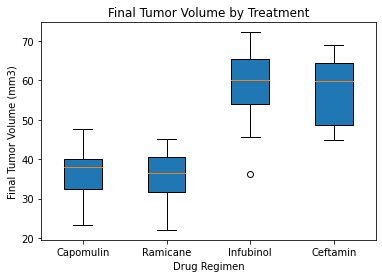

In [160]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
volumes = [capomulin_vol, ramicane_vol, infubinol_vol, ceftamin_vol]
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume by Treatment")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(volumes, labels=treatments, patch_artist=True)
plt.show()

# Line and Scatter Plots

In [161]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_time_vol = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
capomulin_time_vol.value_counts("Mouse ID")


Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [162]:
mouse_x401 = capomulin_df.loc[capomulin_df["Mouse ID"] == "x401",:]
mouse_x401.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0


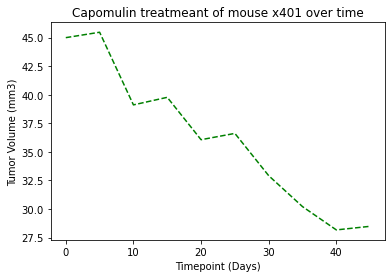

In [163]:
#Generating line plot of tumor volume vs mouse x401 over time
x_axis = mouse_x401["Timepoint"]
y_axis = mouse_x401["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse x401 over time')
plt.plot(x_axis, y_axis, color="green", markersize=15,label="Fahreneit",linestyle="dashed")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

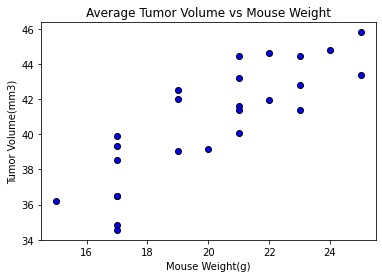

In [164]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = capomulin_time_vol.groupby(capomulin_time_vol["Mouse ID"])["Weight (g)"].mean()
avg_tumor_volume = capomulin_time_vol.groupby(capomulin_time_vol["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(mouse_weight, avg_tumor_volume, marker="o", facecolors="blue", edgecolors="black")
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Tumor Volume(mm3)")
plt.show()
        

# Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


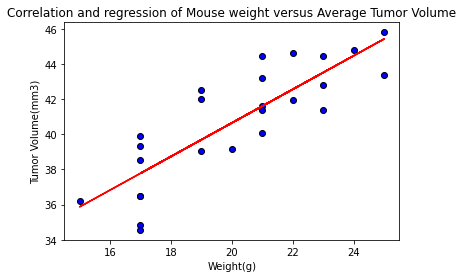

In [207]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_tumor_volume, mouse_weight)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}" )

(slope, intercept, rvalue, pvalue, stderr)= linregress(mouse_weight, avg_tumor_volume)
regress_value = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Generating scatter plot with line to plot
plt.scatter(mouse_weight, avg_tumor_volume, marker="o", facecolors="blue", edgecolors="black")
plt.plot(mouse_weight,regress_value,color="red")
plt.title("Correlation and regression of Mouse weight versus Average Tumor Volume")
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume(mm3)")
plt.annotate(line_eq, (30,20), fontsize=15, color="red")
plt.show()